In [1]:
! git clone https://github.com/dev-S-t/infosis.git

fatal: destination path 'infosis' already exists and is not an empty directory.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("/content/infosis/E-commerce/SampleSuperstore.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df.shape

(9994, 13)

In [6]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

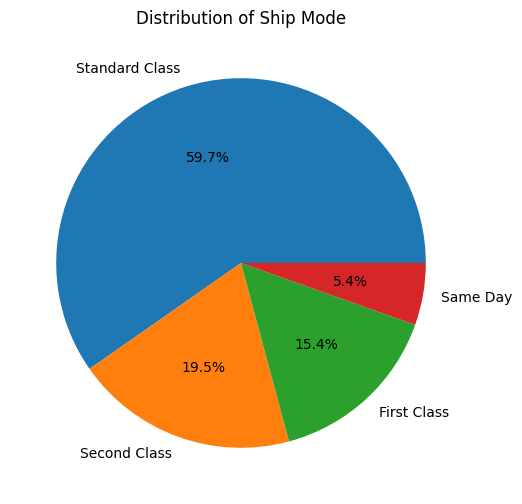

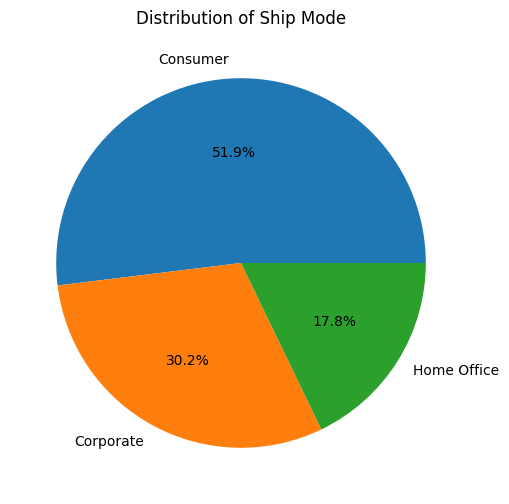

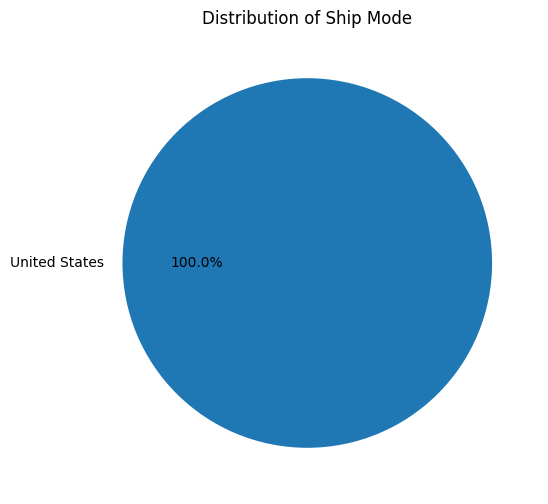

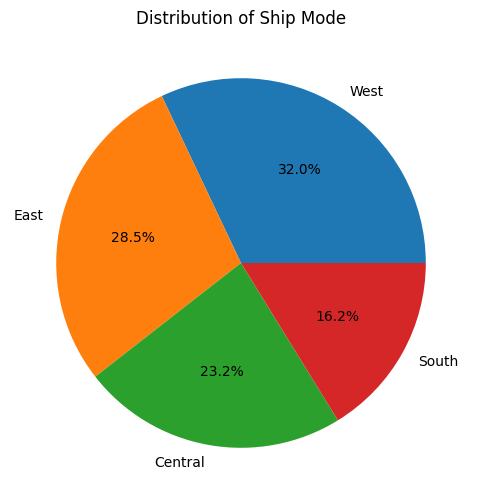

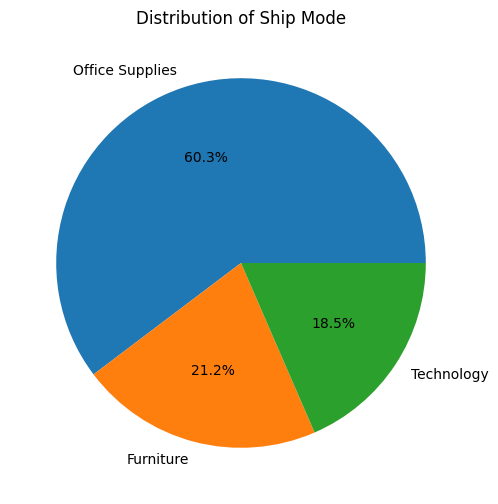

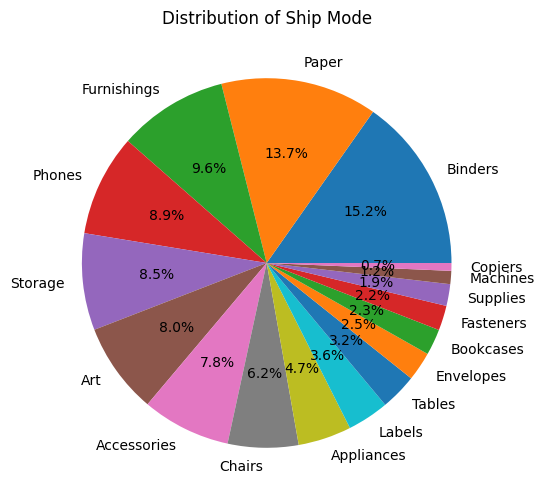

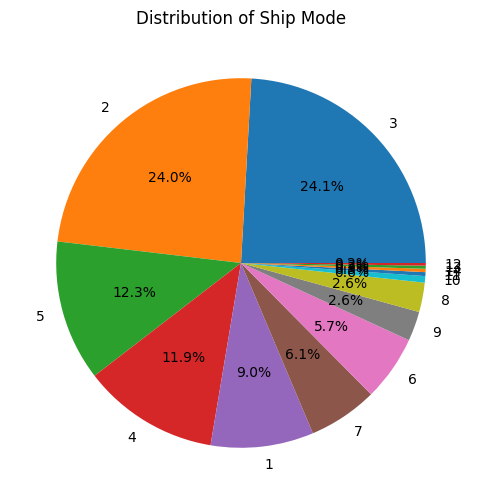

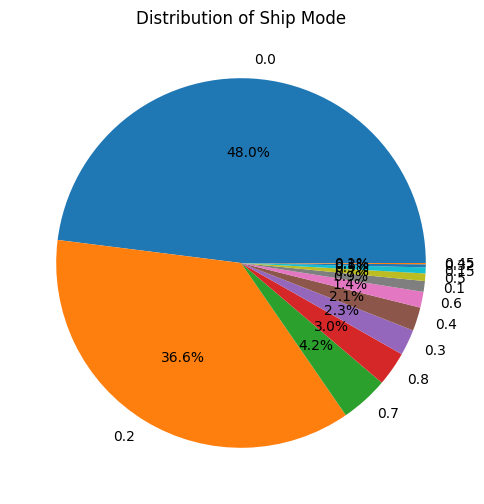

In [7]:
for i in [0,1,2,6,7,8,10,11]:
  plt.figure(figsize=(8, 6))  # Set the figure size
  plt.pie(df[df.columns[i]].value_counts(), labels=df[df.columns[i]].value_counts().index, autopct="%1.1f%%")  # Plot the pie chart
  plt.title("Distribution of "+ df.columns[0])  # Add a title
  plt.show()

In [8]:
df.drop('Country', axis=1, inplace=True)

In [10]:
# from sklearn.preprocessing import OrdinalEncoder
# df_new = df
# encoder = OrdinalEncoder()
# df_new[['Ship Mode', 'Segment', 'City', 'State', 'Region','Category', 'Sub-Category']] = encoder.fit_transform(df_new[['Ship Mode', 'Segment', 'City', 'State', 'Region','Category', 'Sub-Category']])

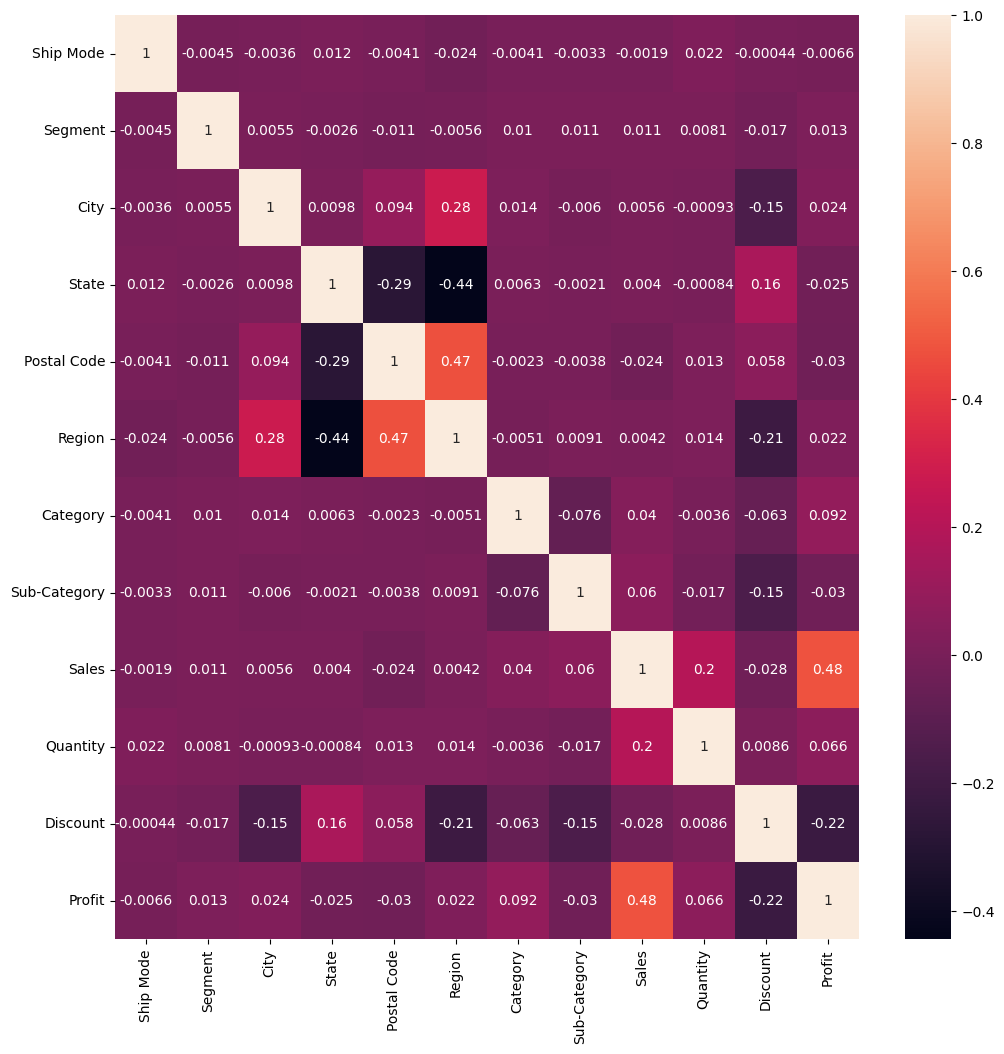

In [11]:
# plt.figure(figsize=(12,12))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

In [12]:
def onehot_encode(df, column):
    df = df.copy()
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    df = df.drop(column, axis=1)
    return df

In [13]:
# One-hot encode categorical features
for column in ['Ship Mode', 'Segment', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category']:
  df = onehot_encode(df, column=column)

In [14]:
y = df['Sales']
X = df.drop('Sales', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)


In [16]:
X_train

,Quantity,Discount,Profit,Ship Mode_0.0,Ship Mode_1.0,Ship Mode_2.0,Ship Mode_3.0,Segment_0.0,Segment_1.0,Segment_2.0,...,Sub-Category_7.0,Sub-Category_8.0,Sub-Category_9.0,Sub-Category_10.0,Sub-Category_11.0,Sub-Category_12.0,Sub-Category_13.0,Sub-Category_14.0,Sub-Category_15.0,Sub-Category_16.0
0,0.551000,-0.755199,-0.082665,-0.431039,-0.240344,2.041121,-1.21243,0.957582,-0.650534,-0.470086,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,2.516403,-0.308812,-0.310475,-0.140812,-0.18314
1,1.907334,-0.755199,0.784858,-0.431039,-0.240344,-0.489927,0.82479,0.957582,-0.650534,-0.470086,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
2,0.098889,0.221382,-0.063841,2.319978,-0.240344,-0.489927,-1.21243,-1.044297,1.537199,-0.470086,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,3.238216,-0.310475,-0.140812,-0.18314
3,-1.257445,-0.755199,-0.131580,-0.431039,-0.240344,-0.489927,0.82479,0.957582,-0.650534,-0.470086,...,6.033773,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
4,-1.257445,0.221382,-0.121448,2.319978,-0.240344,-0.489927,-1.21243,-1.044297,1.537199,-0.470086,...,6.033773,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6990,-0.353222,-0.755199,-0.090207,-0.431039,-0.240344,-0.489927,0.82479,-1.044297,1.537199,-0.470086,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,-0.397393,3.238216,-0.310475,-0.140812,-0.18314
6991,1.003112,-0.755199,-0.114791,2.319978,-0.240344,-0.489927,-1.21243,0.957582,-0.650534,-0.470086,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314
6992,-0.805333,-0.755199,-0.107624,-0.431039,-0.240344,-0.489927,0.82479,0.957582,-0.650534,-0.470086,...,-0.165734,-0.151031,-0.328414,-0.189709,-0.101981,2.516403,-0.308812,-0.310475,-0.140812,-0.18314
6993,0.551000,-0.755199,0.063173,-0.431039,-0.240344,2.041121,-1.21243,-1.044297,1.537199,-0.470086,...,-0.165734,-0.151031,3.044940,-0.189709,-0.101981,-0.397393,-0.308812,-0.310475,-0.140812,-0.18314


In [17]:
y_train

1963     24.900
9348    842.720
8795    211.168
9389      2.040
5090      8.784
         ...   
2895     35.880
7813     10.560
905      12.960
5192    397.600
235     617.976
Name: Sales, Length: 6995, dtype: float64

In [18]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation='relu')(inputs)
x = tf.keras.layers.Dense(256, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1245)]            0         
                                                                 
 dense (Dense)               (None, 256)               318976    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 385025 (1.47 MB)
Trainable params: 385025 (1.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [19]:
model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
175/175 [==============================] - 3s 10ms/step - loss: 439525.3438 - val_loss: 193718.9219 - lr: 0.0010
Epoch 2/100
175/175 [==============================] - 1s 8ms/step - loss: 355693.0000 - val_loss: 181513.0000 - lr: 0.0010
Epoch 3/100
175/175 [==============================] - 2s 9ms/step - loss: 325031.8438 - val_loss: 349283.0938 - lr: 0.0010
Epoch 4/100
175/175 [==============================] - 1s 9ms/step - loss: 311143.2500 - val_loss: 550791.4375 - lr: 0.0010
Epoch 5/100
175/175 [==============================] - 1s 8ms/step - loss: 273821.6562 - val_loss: 1626424.7500 - lr: 0.0010
Epoch 6/100
175/175 [==============================] - 1s 8ms/step - loss: 257438.9531 - val_loss: 5058166.5000 - lr: 0.0010
Epoch 7/100
175/175 [==============================] - 2s 12ms/step - loss: 247445.4844 - val_loss: 9537331.0000 - lr: 0.0010


In [20]:
test_loss = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss: {:.5f}".format(test_loss))

Test Loss: 275534.40625


In [21]:
y_pred = np.squeeze(model.predict(X_test))
test_r2 = r2_score(y_test, y_pred)

print("Test R^2 Score: {:.5f}".format(test_r2))

94/94 [==============================] - 0s 3ms/step
Test R^2 Score: 0.25605
